# Explarotary Analysis for Store Data

- Handling for missing entries
- Data types and formats that should be chaged
- Univariate analysis of the feature
- Bivariate anlaysis of the feature

# Import Packages 

In [195]:
import imp
import os,sys
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np

#import custome modules
sys.path.append('../')
from scripts import data_loader

from scripts.get_missing_information import MissingInformation
from scripts.ploting_utils import Plotters
from scripts.data_clean_handler import CleanData
from scripts.dvc_data_fetch import DataLoader

dvc_load = DataLoader()
cleaner = CleanData()

# Extract Store Data

In [196]:
import dvc.api


In [197]:
store_df = pd.read_csv('../data/raw/store.csv')

In [198]:
# data_path = '../data/raw/store.csv'
# versions = 'store_v1'
# repo = '../'
# store_df = dvc_load.dvc_get_data(path=data_path, version=versions, repo=repo)

# store_df.head()


In [199]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


contains 9 column with 1115 rows. There are also missing valuess in 
- CompetitionOpenSinceMonth
- CompetitionOpenSinceYear
- Promo2SinceWeek
- Promo2SinceYear
- PromoInterval

There 3 categorical, 2 int64, and 4 float 64 attributes 

In [200]:
promo_store = store_df[store_df['Promo2'] == 0]
promo_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1113
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      544 non-null    int64  
 1   StoreType                  544 non-null    object 
 2   Assortment                 544 non-null    object 
 3   CompetitionDistance        542 non-null    float64
 4   CompetitionOpenSinceMonth  396 non-null    float64
 5   CompetitionOpenSinceYear   396 non-null    float64
 6   Promo2                     544 non-null    int64  
 7   Promo2SinceWeek            0 non-null      float64
 8   Promo2SinceYear            0 non-null      float64
 9   PromoInterval              0 non-null      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 46.8+ KB


##### The Missing values in Promo2SinceWeek, Promo2SinceYear, and PromoInterval is equal. They are null for the store who did not run promotion at all

In [201]:
minfo = MissingInformation()

mis_val_table_ren_columns = minfo.missing_values_table(store_df)
mis_val_table_ren_columns


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


<AxesSubplot:>

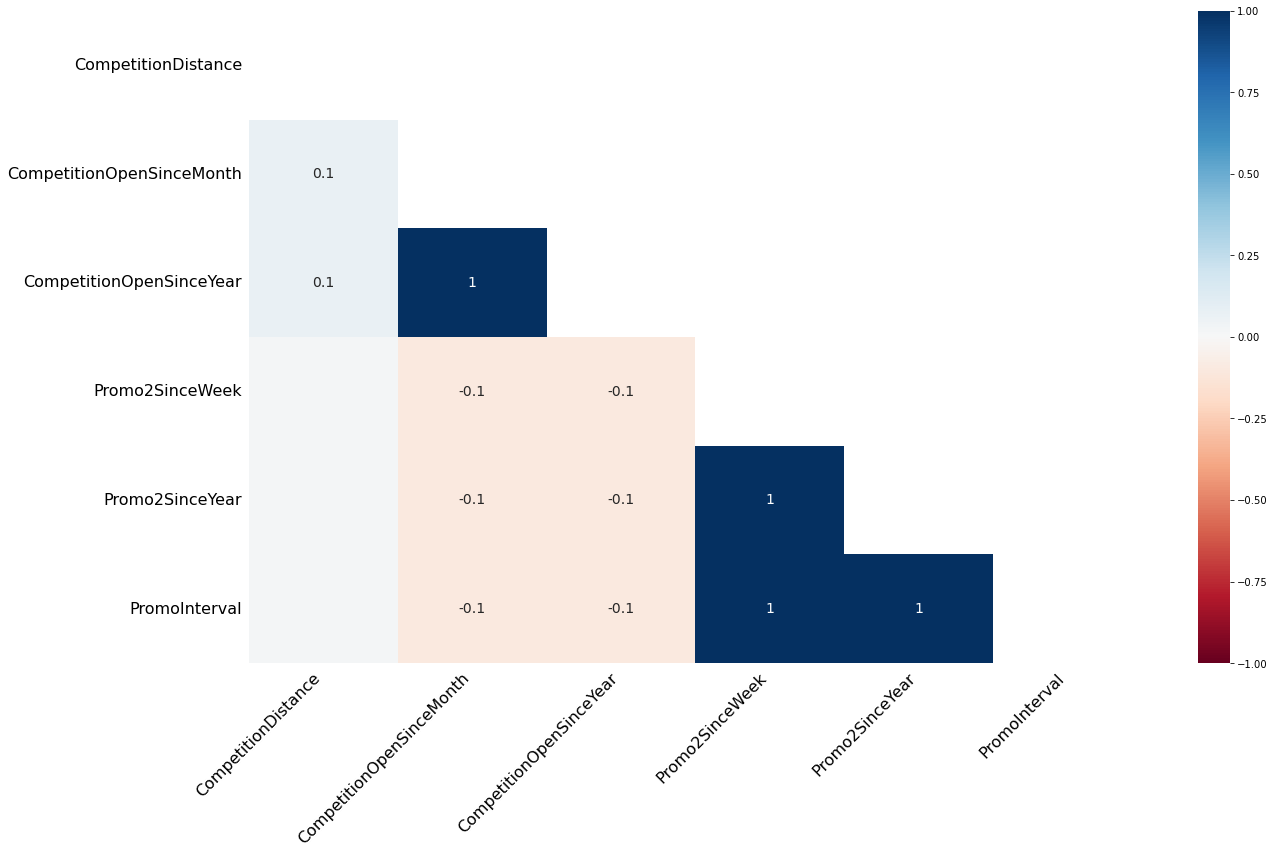

In [202]:
msno.heatmap(store_df)


##### We may have the distance to the nearest competition but the CompetitionOpenSinceMonth, and CompetitionOpenSinceYear may be null.

# Handling missing values

In [203]:
cols_with_missing = mis_val_table_ren_columns.index
cols_with_missing


Index(['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
       'CompetitionDistance'],
      dtype='object')

In [204]:
cols_with_missing[3],

('CompetitionOpenSinceMonth',)

In [205]:

store_df = cleaner.replace_missing(df=store_df,
                                   columns=cols_with_missing[:2],
                                   method='zero')
store_df = cleaner.replace_missing(df=store_df,
                                   columns=cols_with_missing[2:3],
                                   replace_with='none')


CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceWeek with method: zero
CleanDataFrameLogger - INFO - Replacing missing values in column: Promo2SinceYear with method: zero


In [206]:
minfo.missing_values_table(store_df)


,Missing Values,% of Total Values,Dtype
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


##### Missing values are realated. If there a miss in CompetitionOpenSinceYear there it will be also in CompetitionOpenSinceMonth. And it is the same for Promo2SinceWeek and Promo2SinceYear.

<AxesSubplot:>

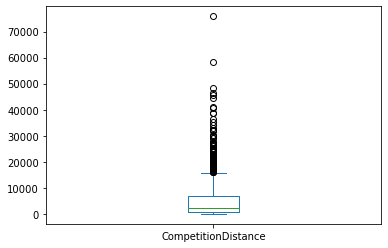

In [207]:
store_df['CompetitionDistance'].plot.box()


In [208]:
store_df.skew()

/var/folders/6b/0t1qb1d92f72c46kvp35pwfc0000gn/T/ipykernel_6576/3537902024.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  store_df.skew()


Store                        0.000000
CompetitionDistance          2.929286
CompetitionOpenSinceMonth   -0.170750
CompetitionOpenSinceYear    -8.013062
Promo2                      -0.048510
Promo2SinceWeek              0.950294
Promo2SinceYear             -0.048506
dtype: float64

##### Since the CompetitionDistance is skewed, and has alot of outliers, we fill the missing with mode and handle the outliers using winsorize.


In [209]:

store_df = cleaner.fill_mode(
    store_df, ['CompetitionDistance'])


<AxesSubplot:>

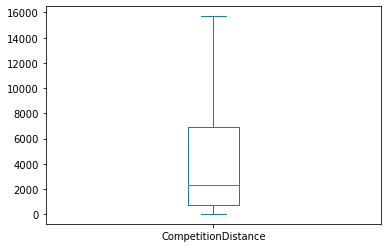

In [210]:
from scipy.stats.mstats import winsorize

store_df['CompetitionDistance'] = winsorize(
    store_df['CompetitionDistance'], (0.0, 0.10))
store_df['CompetitionDistance'].plot.box()


Fill the CompetitionOpenSinceYear with Promo2SinceYear and fill the CompetitionOpenSinceMonth I by a randomly selected month for each row.

In [211]:
missing_comp = store_df['CompetitionOpenSinceYear'].isnull().values
store_df.loc[missing_comp, 'CompetitionOpenSinceYear'] = store_df.loc[missing_comp, 'Promo2SinceYear']

store_df['CompetitionOpenSinceMonth'].fillna(
    np.random.choice(store_df['Promo2SinceYear'].notna()), inplace=True)


In [212]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,none
4,5,a,a,15700.0,4.0,2015.0,0,0.0,0.0,none


In [213]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   object 
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 87.2+ KB


# Categorical Count

In [214]:
pl = Plotters(10,6)

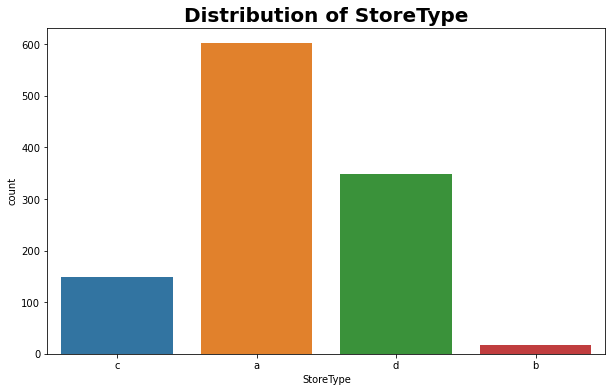

In [215]:
pl.plot_count(store_df,'StoreType')

In [216]:
data_loader.get_percentage_counts(store_df, 'StoreType')


,StoreType
a,602
d,348
c,148
b,17


##### Most of the store belongs to store type a. d is a second store type that contains many store.

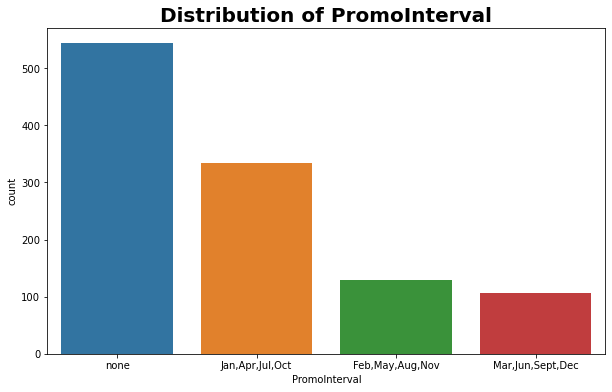

In [217]:
pl.plot_count(store_df,'PromoInterval')

In [218]:
data_loader.get_percentage_counts(store_df, 'PromoInterval')


,PromoInterval
none,544
"Jan,Apr,Jul,Oct",335
"Feb,May,Aug,Nov",130
"Mar,Jun,Sept,Dec",106


##### Most of the stores run their promotion on a interval of Jan, Apr, Jul, and Oct.

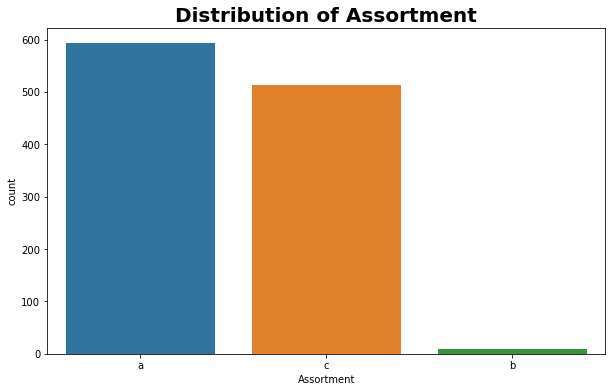

In [219]:
pl.plot_count(df=store_df,column='Assortment')

In [220]:
data_loader.get_percentage_counts(store_df, 'Assortment')


,Assortment
a,593
c,513
b,9


In [221]:
513/(593+513+9)

0.4600896860986547

##### 53% of the stores are using 'a' assortment strattegy. 46% of the stores are using 'c' assortment strategy. 'b' assrotment strategy is hardly popular among the stores.

# Bivariate Analysis

Text(0.5, 1.0, 'Store Promo outliers')

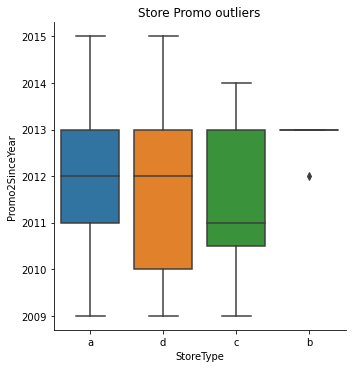

In [222]:
sns.catplot(x="StoreType", y="Promo2SinceYear", kind="box",
            data=store_df.query("Promo2SinceYear!=0"))
plt.title("Store Promo outliers")

Text(0.5, 1.0, 'Store Assortment Type')

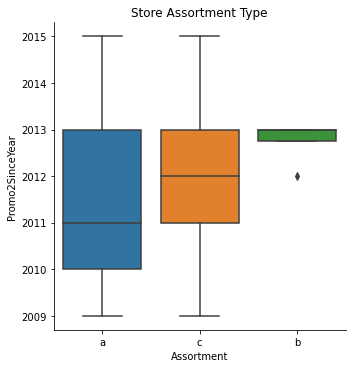

In [223]:
sns.catplot(x="Assortment", y="Promo2SinceYear", kind="box",
            data=store_df.query("Promo2SinceYear!=0"))
plt.title("Store Assortment Type")


Text(0.5, 1.0, 'StoreType vs CompetitionDistance')

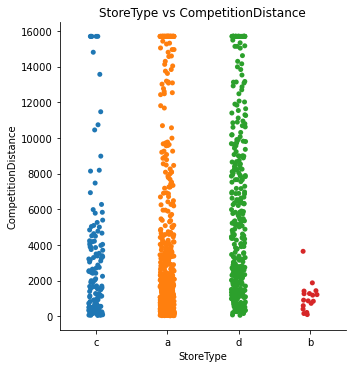

In [224]:
sns.catplot(x="StoreType", y="CompetitionDistance", data=store_df)
plt.title("StoreType vs CompetitionDistance")


Text(0.5, 1.0, 'Assortment vs CompetitionDistance')

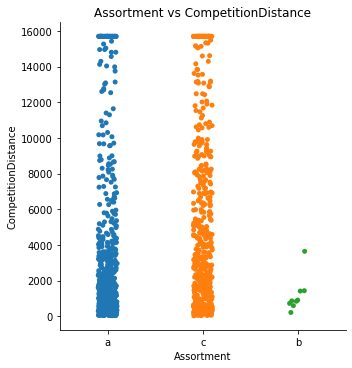

In [225]:
sns.catplot(x="Assortment", y="CompetitionDistance", data=store_df)
plt.title("Assortment vs CompetitionDistance")


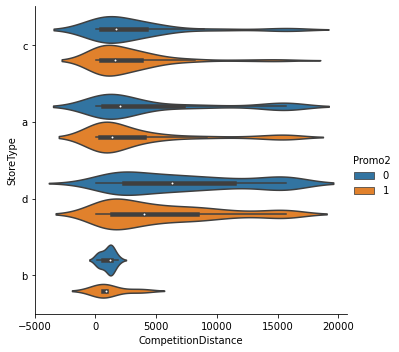

In [226]:
sns.catplot(x="CompetitionDistance", y="StoreType", hue="Promo2",
            kind="violin", data=store_df)


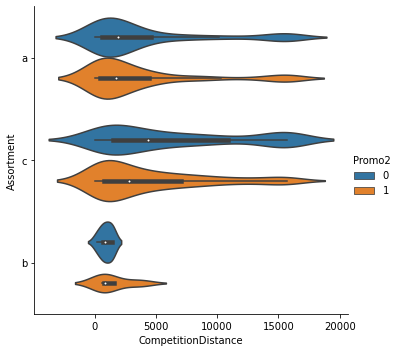

In [227]:
sns.catplot(x="CompetitionDistance", y="Assortment", hue="Promo2",
            kind="violin", data=store_df)


# Save

In [228]:
store_df.to_csv('../data/cleaned/store.csv',index=False)